# Simulation of an AS-AD model

Imports and set magics:

In [1]:
# autoreload 
%load_ext autoreload
%autoreload 2

# import class from py file
from modelproject import ModelClass

# Model description

I will focus on the aggregate supply - aggregate demand model for the open economy with a floating exchange rate. The model is a macroeconomic model. The model shows the short run dynamics for the economy. The model can be solved using the following equations. From the monetary policy rule it can be seen that i have allowed the centralbank to react to inflation, output and the exchange rate. y is output, $\pi$ is inflation, i is the centralbank interest rate, r is the real interest rate. h,b and $\lambda$ are the centralbanks' reactions to deviations in inflation, output and the nominal exchange rate. $e$ and $e^r$ are the natural logarithm to the nominal exchange rate and the real exchange rate.$s$ and $\tilde{z}$ are shocks. An exponentiated f means that the variable is the according variable in the foreign country.  An exponentiated e means that the variable is the expected variable. +1 and -1 are time subscripts. 

Short run AD curve for the open economy:

$ y - \bar{y} = \beta_1 e^r - \beta_2 (r-\bar{r}^f) + \tilde{z} $

Short run AS curve:

$ \pi = \pi^{e} + \gamma (y - \bar{y}) + s$ 

Monetary policy rule:

$ i = r^f + \pi^{e}_{+1} + h(\pi-\pi^*) + b(y - \bar{y}) + \lambda (e - e_{-1})  $ 

Change in the nominal exchange rate:

$ \Delta e = - \frac{1}{\theta} (i-i^f)$

Real exchange rate:

$ e^r = e^r_{-1} + \Delta e + \pi^f - \pi $

Inflation expectations:

$ \pi^{e} = \pi^* = \pi^f $

Fisher equation:

$ r = i - \pi^{e}_{+1} $



## Analytical solution

From the monetary policy rule, the Fisher equation and using that $\pi^* = \pi^f $ you can get the following expression for $ r - \bar{r}^f$ :

$ r - \bar{r}^f = h(\pi - \pi^f ) + b(y - \bar{y}) + \lambda ( e - e_{-1}) + r^f - \bar{r}^f $

From the monetary policy rule, the Fisher equation and the equation for the change in the nominal exchange you can get the following expression for $\Delta e$:

$ \Delta e = - \frac{1}{\theta + \lambda} (h (\pi - \pi^f) + b(y- \bar{y}))$

I insert the expression for the change of the nominal exchange rate into the expression for the real exchange rate to get:

$ e^r = e^r_{-1} - (\pi - \pi^f) - \frac{1}{\theta+\lambda} (h(\pi-\pi^f) + b(y-\bar{y})) $

Inserting these expressions into the AD curve yields:

$ y - \bar{y} = \beta_1 (e^r_{-1} - (\pi - \pi^f) - \frac{1}{\theta+\lambda} (h(\pi-\pi^f) + b(y-\bar{y}))) - \beta_2 (h(\pi - \pi^f ) + b(y - \bar{y}) + \lambda ( e - e_{-1}) + r^f - \bar{r}^f) + \tilde{z}  $

I use Sympy to solve this equation for $\pi$ and thus find the AD curve as a function of output and the nominal exchange rate

In [2]:
model = ModelClass()
model.solve_analytical()

Eq(pi, (-b*beta_1*y + b*beta_1*ybar - b*beta_2*lambda*y + b*beta_2*lambda*ybar - b*beta_2*theta*y + b*beta_2*theta*ybar + beta_1*e^{r}_{-1}*lambda + beta_1*e^{r}_{-1}*theta + beta_1*h*pi^f + beta_1*lambda*pi^f + beta_1*pi^f*theta - beta_2*e*lambda**2 - beta_2*e*lambda*theta + beta_2*e_{-1}*lambda**2 + beta_2*e_{-1}*lambda*theta + beta_2*h*lambda*pi^f + beta_2*h*pi^f*theta - beta_2*lambda*r^f + beta_2*lambda*rbar^f - beta_2*r^f*theta + beta_2*rbar^f*theta - lambda*y + lambda*ybar + lambda*ztilde - theta*y + theta*ybar + theta*ztilde)/(beta_1*h + beta_1*lambda + beta_1*theta + beta_2*h*lambda + beta_2*h*theta))

A small rewrite of this gives the final AD curve:

$ \pi = \hat{\beta}^{-1} ( - (b \beta_1 + b \beta_2 \lambda + b \beta_2 \theta + \lambda + \theta ) (y - \bar{y}) + (\beta_1 \lambda + \beta_1 \theta) e^r_{-1} - (\beta_2 \lambda^2 + \beta_2 \lambda \theta) (e - e_{-1}) + (\lambda + \theta) \bar{z} ) + \pi^f $

Where $ \hat{\beta} = \beta_1 h + \beta_1 \lambda + \beta_1 \theta + \beta_2 h \lambda + \beta_2 h \theta$ and $-(\beta_2 \lambda + \beta_2 \theta)(r^f - \bar{r}^f$) is included in the new error term $\bar{z}$

By inserting the expectation into the AS curve, the AS curve becomes:

$ \pi = \pi^f + \gamma (y- \bar{y}) + s $

Likewise the monetary policy rule becomes:

$ i = r^f + \pi^f + h(\pi - \pi^*) + b(y- \bar{y}) + \lambda(e-e_{-1}) $

## Numerical solution

I simulate the model for 100 periods. In the first period i assume that the economy is in steady state and that $e^r = e = 0$ which means that real exchange rate and the nominal exchange rate both are 1. In all following periods i solve the model by solving a linear equation system consisting of the equations for the AD curve, the AS curve, the monetary policy rule and an equation for the nominal exchange rate given by:

$ e = e_{-1} - \frac{1}{\theta + \lambda} (h (\pi - \pi^f) + b(y- \bar{y})) $

where i have used the expression for $\Delta e$ found before. The four unknowns are $y, \pi , e, i$. The equation system can be written as:

$ Ax=B$

Where A is:

$ A = 
\begin{pmatrix}  
b & h & \lambda & -1 \\
\frac{b}{\theta + \lambda} & \frac{h}{\theta + \lambda} & 1 & 0 \\
-\gamma & 1 & 0 & \\
\hat{\beta}^{-1} (b\beta_1 + b\beta_2 \lambda + b\beta_2 \theta + \lambda + \theta) & 1 & \beta_2 \lambda^2 + \beta_2 \lambda \theta & 0 \\ 
\end{pmatrix}
$

B is:

$ B =
\begin{pmatrix}
\pi^f (h-1) + b \bar{y} + \lambda e_{-1} - r^f \\
e_{-1} + \frac{h}{\theta + \lambda} \pi^f + \frac{b}{\theta + \lambda} \bar{y} \\
\pi^f - \gamma \bar{y} + s \\
\hat{\beta}^{-1} ( b\beta_1 + b\beta_2 \lambda + b \beta_2 \theta + \lambda + \theta) \bar{y} + e^{r}_{-1} (\beta_1 \lambda + \beta_1 \theta) + (\beta_2 \lambda^2 + \beta_2 \lambda \theta) e_{-1} + (\lambda + \theta) \bar{z} + \pi^f \\
\end{pmatrix}
$

And x is:

$ x =
\begin{pmatrix}
y \\
\pi \\
e \\
i\\
\end{pmatrix}
$


Solving this system yields output, inflation, the nominal exchange rate and the nominal interest rate in each period. I then use the equation for the real exchange rate to comput the real exchange rate each period. After these five variables have been computed i can then do the same in the next period and so on. The algorithm for solving and simulating the model therefore is:

1. Set the variables equal to the steady state variables. 

2. Solve the linear equation system in the next period to find output, inflation, the nominal exchange rate and the nominal interest rate

3. Use these variables to compute the real exchange rate. After this go back to step 2. Continue until all periods have been simulated.

To begin with i let the shocks be zero in all periods, and the economy should therefore stay in steady state.

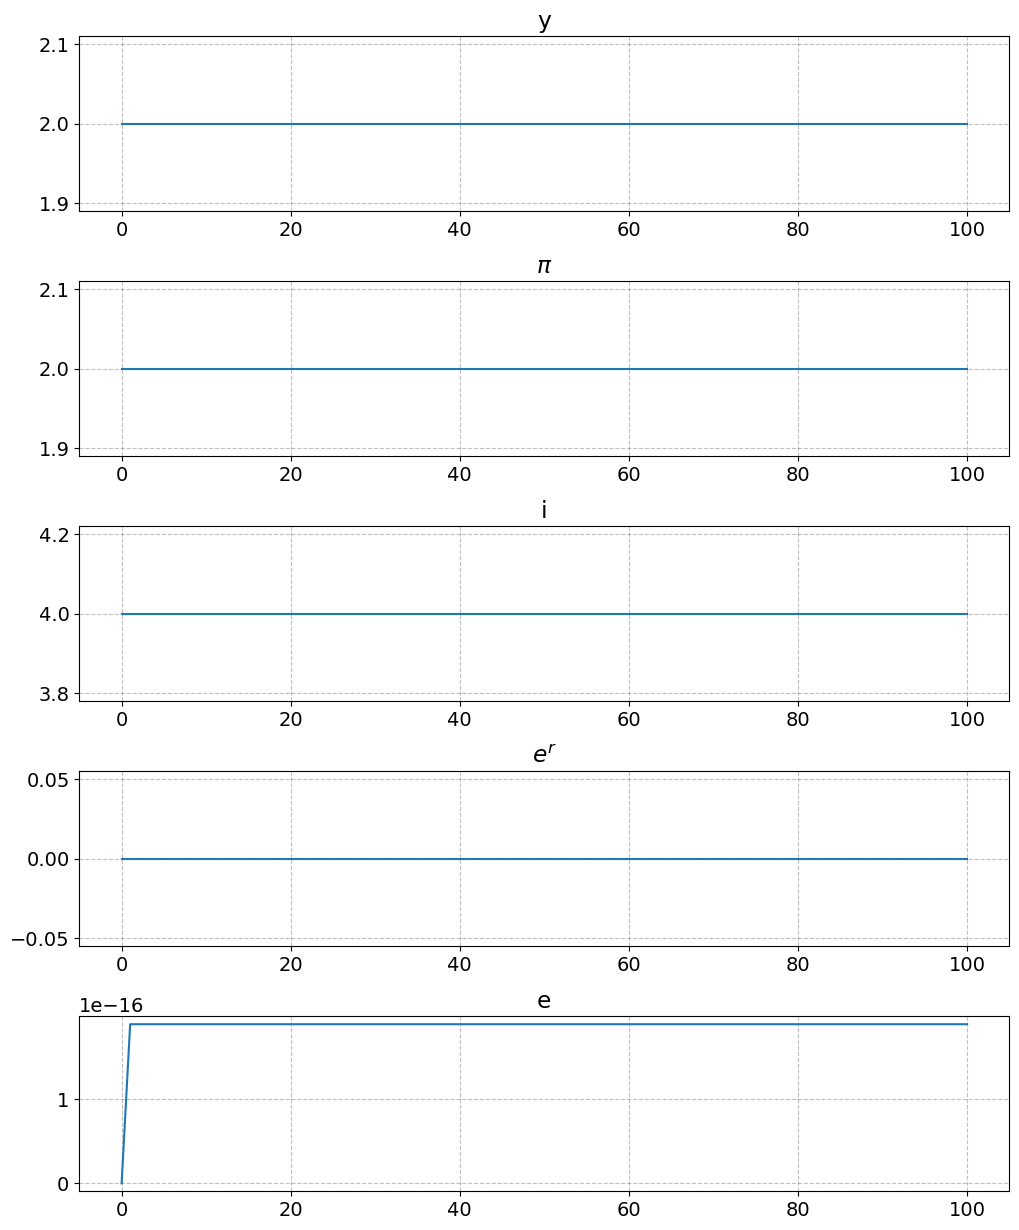

In [3]:
model.short_run(0.5,0.5,0.5,1,0.3,0.7,0.7, shocks = False)

It can be seen that without shocks the economy stays in the steady state and all variables remain constant. I will now introduce shocks. The shocks are autoregressive and defined as follows:

$ z = 0,9 z_{-1} + 0,5 u_z $

$ s = 0,9 s_{-1} + 0,5 u_s $

where $u_z , u_s$ are error terms that are standard normal distributed and independent of each other. The results are:

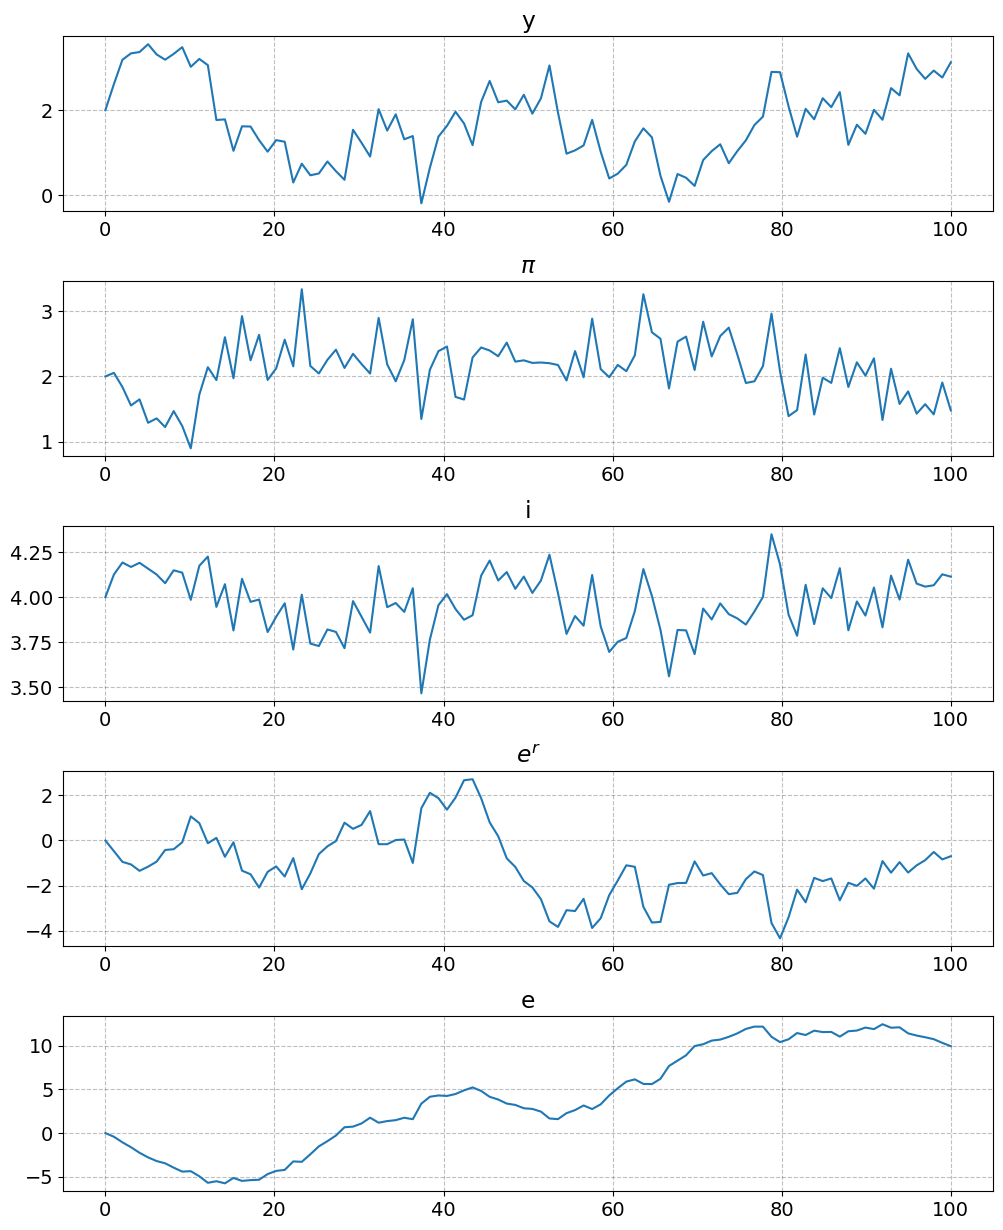

In [4]:
model.short_run(0.5,0.5,0.5,1,0.3,0.7,0.7, shocks = True)

The variables seem to fluctuate around the steady state values, in a somewhat realistic way.

# Further analysis

I now try to increase h which is the centralbanks' reaction to inflation. I would expect an increase to lower the fluctuation in $\pi$ but increase the fluctuation in $i$

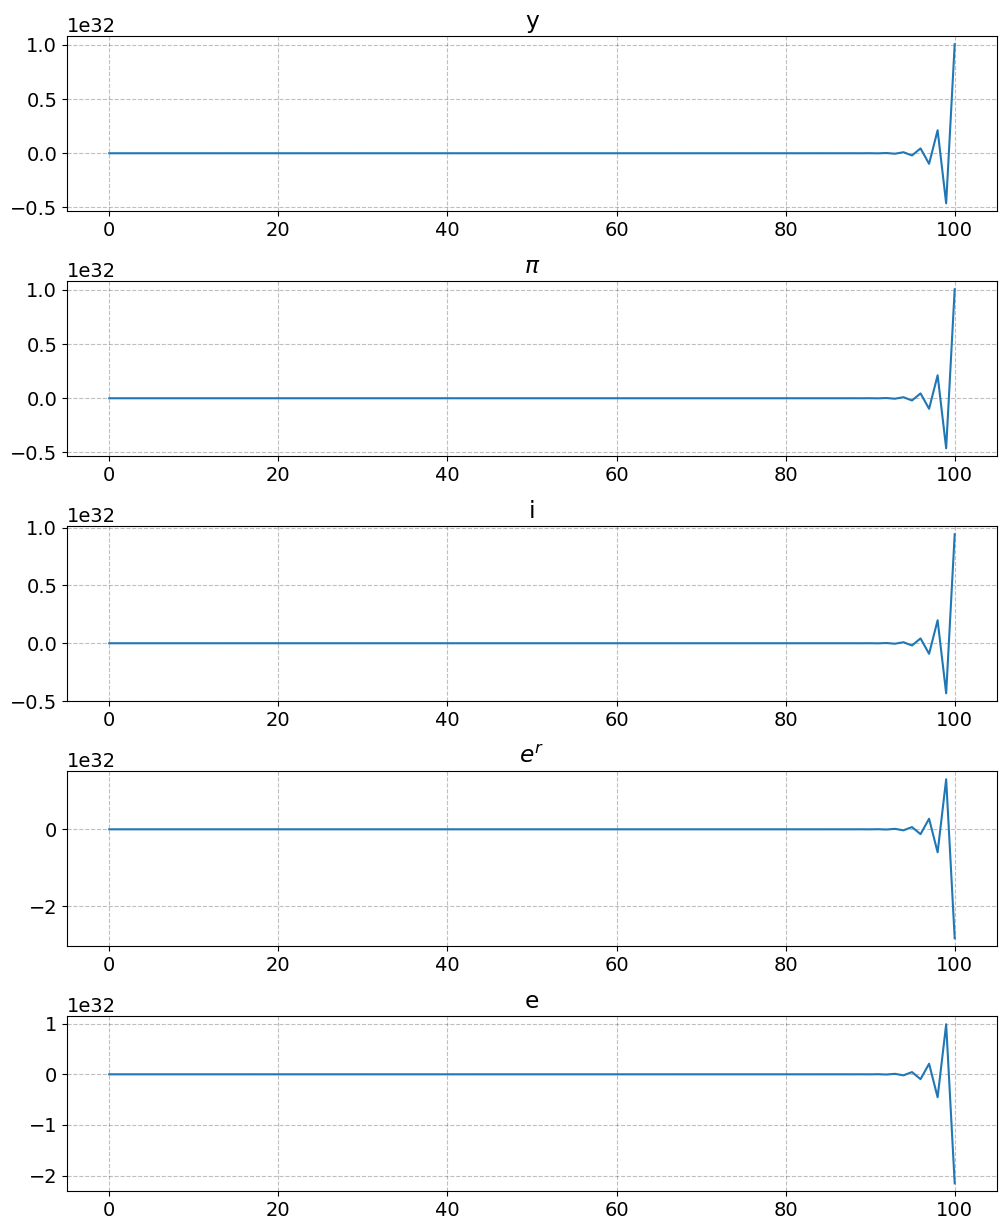

In [5]:
model.short_run(2,0.5,0.5,1,0.3,0.7,0.7, shocks = True)

This seems to cause the model to become unstable and to no longer have a force driving it toward equilibrium. I now try to increase h only a little from its previous level

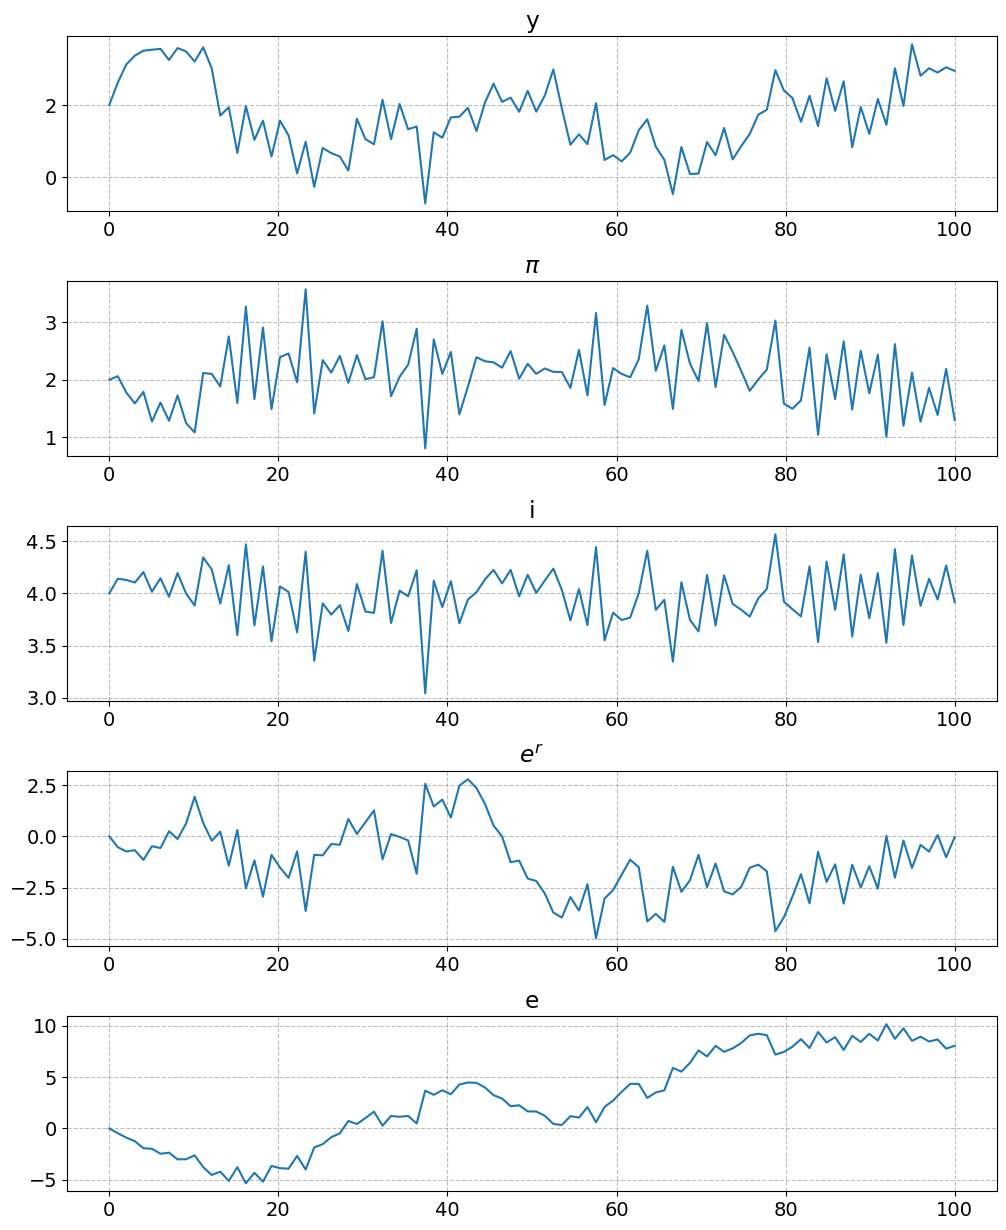

In [6]:
model.short_run(1,0.5,0.5,1,0.3,0.7,0.7, shocks = True)

It seems that the interest rate especially fluctuates more now. Finally i will try to increase $\gamma$. $\gamma$ is the slope of the AS curve and determines the effect of an output gap on inflation.

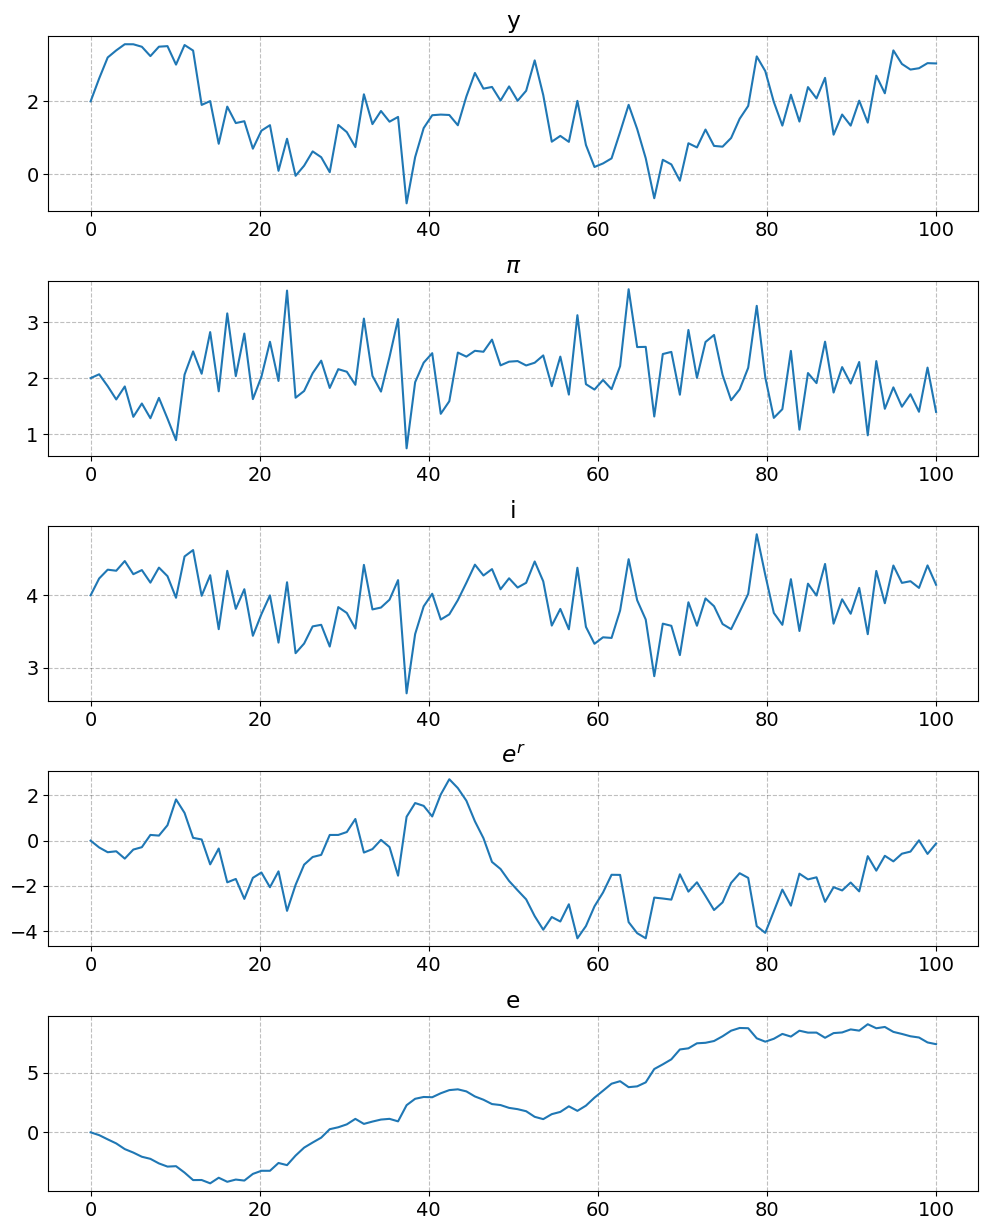

In [7]:
model.short_run(0.5,0.5,0.5,1,1,0.7,0.7, shocks = True)

This causes the interest rate to fluctuate more and the nominal exchange rate to fluctuate less.

# Conclusion

I have simulated the AS-AD model for an open economy with a floating exchange rate. I allowed the centralbank to perform "dirty floating", that is I allowed the central bank to use its interest rate to react to changes in the nominal exchange rate. The simulated time series seem alike to real economic time series data. For certain values of parameters the model becomes unstable and fails to be keep around the steady state. 